In [ ]:
# Francisco Gonzalez ci:4304266

In [1]:
from alg_gramschm import QR_gramschmidt
from qr_tran_householder import trans_householder, QR_householder

In [2]:
import numpy as np
import pandas as pd

In [18]:
matrices = {}
for i in range(20):
    matrices[i] = 10*np.random.random_sample((3,3))-5

In [19]:
matrices

{0: array([[-0.76829153, -1.74167245, -2.62355731],
        [ 0.23231009, -0.2322387 , -0.81090388],
        [ 4.95119225,  1.66036575,  1.11933357]]),
 1: array([[ 3.82371058,  4.21350396, -3.89228562],
        [-3.34603024, -2.33351302, -2.61195321],
        [-4.81953962, -3.46806246,  0.26034545]]),
 2: array([[-1.6633746 ,  0.99739813, -2.59391779],
        [ 2.26961863,  0.4415288 , -3.69114655],
        [-0.33710591, -3.05968902, -1.08230404]]),
 3: array([[-4.66257144, -0.30916557, -0.24791361],
        [ 3.44098492,  3.06020408,  2.9095201 ],
        [ 3.81347851,  1.21850131,  1.27384856]]),
 4: array([[-2.76369151,  4.81209834, -1.9522872 ],
        [ 0.91648724,  3.82354683,  2.45381503],
        [ 2.7251236 , -4.27994339, -1.67002098]]),
 5: array([[ 0.89817134,  3.94784499,  3.49062146],
        [-0.68645981,  3.95851326, -4.47587429],
        [-1.44476895,  1.27146837,  0.78521603]]),
 6: array([[-2.83127165, -2.1442065 , -4.49344859],
        [-4.49126842, -3.49927354, -

In [20]:
def comparacion_norma(matrices): #funcion cuya salida son las normas solicitadas
    matrices_2 = {}
    I = np.identity(3) # matriz identidad 3x3
    for i in range(len(matrices)):
        [Qg, Rg, Pg, Tg] = QR_gramschmidt(matrices[i]) # metodo de Gram-Schmidt A = Q.R
        [Qh, Rh, Ph, Th] = QR_householder(matrices[i]) # transformaciones de Householder P.A = T,~ A=Pt.T,~ A=Q.R 
        x1 = Qg.dot(Qg.T) - I  # matriz Q∗Q − I
        x2 = Ph.T.dot(Ph) - I  # matriz P∗P − I
        # se guardan las normas de las matrices anteriores como tuplas
        matrices_2[i] = np.linalg.norm(x1), np.linalg.norm(x2) # norma de Frobenius
    return matrices_2

In [21]:
matrices_1=comparacion_norma(matrices)
df = pd.DataFrame.from_dict(matrices_1, orient='index').rename(columns={0:'Gram-Schmidt',1:'Householder'})
print(df)

    Gram-Schmidt   Householder
0   1.998263e-15  4.918545e-16
1   5.878845e-16  3.973994e-16
2   1.962616e-16  4.191000e-16
3   5.230730e-15  2.482534e-16
4   8.020953e-16  4.014976e-16
5   1.755417e-16  2.603704e-16
6   4.049678e-16  6.567068e-16
7   4.746934e-16  1.962616e-16
8   1.814332e-15  3.949688e-16
9   4.927103e-16  3.098509e-16
10  4.839350e-16  8.635509e-16
11  3.421937e-16  2.857611e-16
12  4.228024e-15  4.926722e-16
13  2.844100e-16  1.861901e-16
14  8.726470e-16  2.763388e-16
15  2.897235e-15  2.288783e-16
16  5.399868e-16  5.609786e-16
17  6.353542e-16  7.986664e-16
18  2.593030e-15  3.140185e-16
19  4.677453e-16  6.020465e-16


In [22]:
import matplotlib.pyplot as plt

<AxesSubplot:>

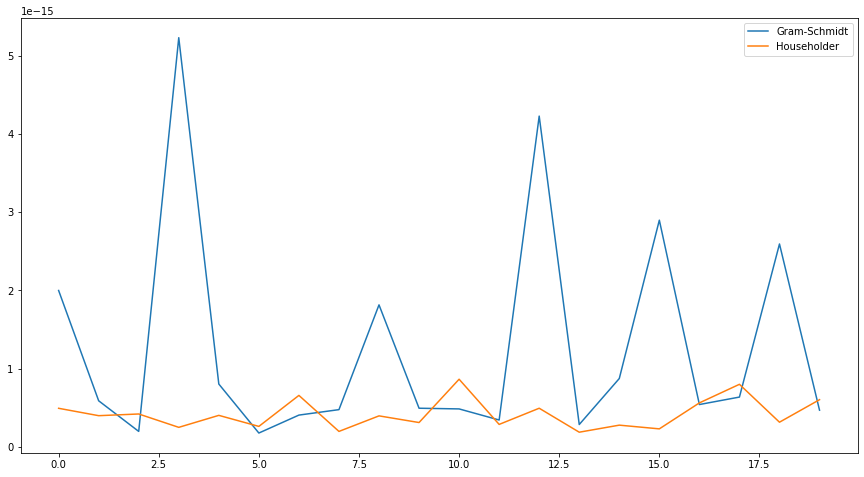

In [23]:
df.plot(figsize=(15,8))